#Prediction of Melbourne House Price
Melbourne House Market Dataset Source: Domain.com.au</br>
Supplement Dataset (Income Dataset) Source: https://data.gov.au/data/dataset/taxation-statistics-postcode-data

The purpose of this project is to predict a reasonable price for a house at Melbourne's house market when given data. Some business questions we aim to solve are: 
1. Which council's house price is higher? Is its further or closer from the CBD? Why do some councils price are higher than others?
2. Which month should buyers purchase houses to get a better deal? Is there a ongoing trend for house price?
3. Which type of houses are more popular? 
4. Using which model can have the best performance on predicting house price?



**Project Obejectives:**

We will make an analysis through the Melbourne Housing Market dataset (contains over 30 thousand rows and 21 different variables) to figure out related factors. Our goal is to use given variables including geographic location, house size, number of rooms, and selling method to predict the housing price in Melbourne. We will use Python to achieve data processing and cleaning. We also plan to make the analysis visualization using seaborn and matplotlib as tools and create machine learning models to perform analysis and prediction on Melbourne housing price.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
#Primary Dataset
df = pd.read_csv('https://raw.githubusercontent.com/zizgao/BA780/main/Melbourne_housing_FULL.csv')
#Supplementary dataset of council's wealthiness
df_tax = pd.read_csv('https://raw.githubusercontent.com/zizgao/BA780/main/Aus_Tax_Data.csv')

# 1 Introduction
The dataset includes price, house structures, locations, time series data of Melbourne's house market. It has 34,858 rows and 21 columns. The datatypes of the variables of the datasets include numerical, categorical, and geographical data. 

The introduction of the variables are as follows: 

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:Sold Method

Type: House Types

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [2]:
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


None

# 2 Data Cleansing
1. Massive observations have multiple rows of missing values because of flaws when scraping data from the website.
2. Some oberservations have null valus as price is not disclosed
3. Variable rooms will not be used since room is scraped from a website while variables Bedrooms2, Bathroom, Car are scarped from another. We decided to use variables Bedrooms2, Bathroom, Car to make sure consistency.
4. Null values in price will be dropped since price is our target variable and it should not be replaced with any estimation which will affect the model's accuracy. 


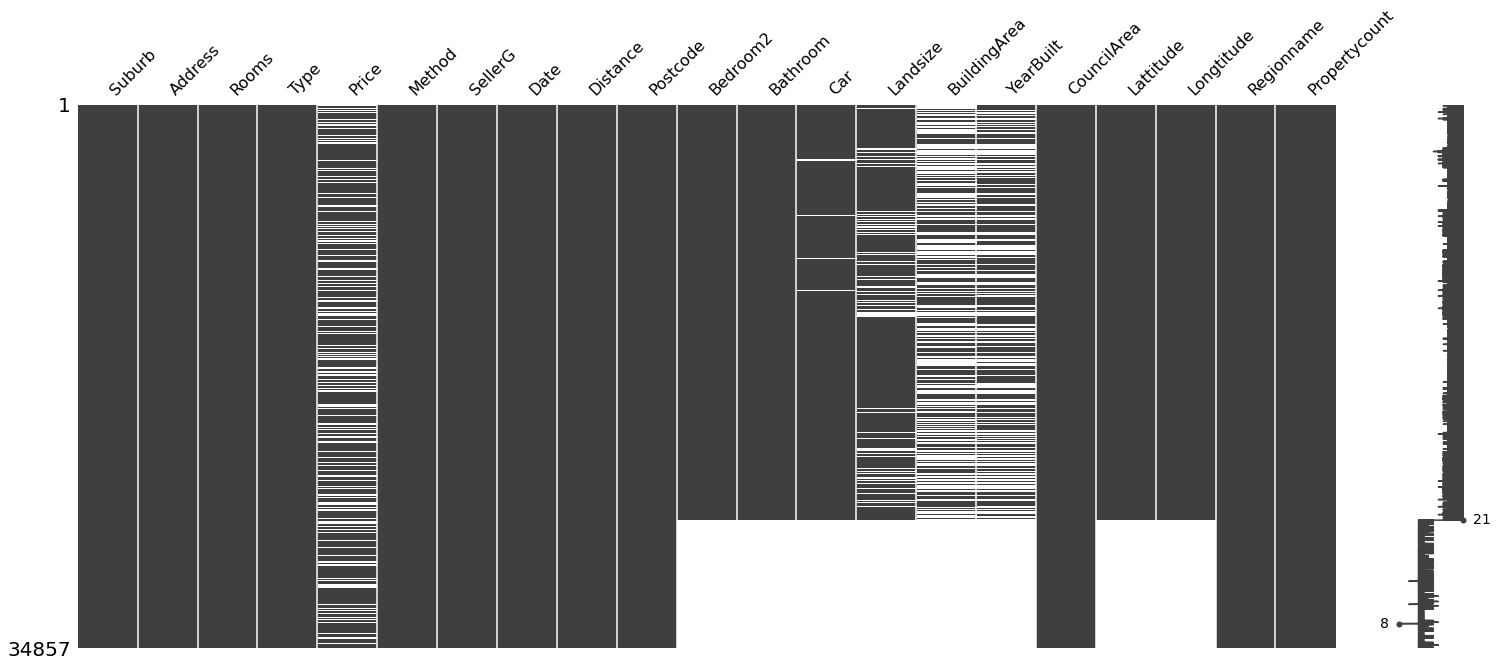

In [3]:
msno.matrix(df.sort_values(['Bedroom2']))

We used a threshold of 19 as the first step of the cleaning process. We chose 19 as we do not want oberservations that have too many missing values

In [4]:
df = df.dropna(thresh=19)

We also noticed that massive BuildingArea and YearBuilt data are still missing. For now we will use dropping and imputation to deal with the missing value; Later we will try to drop the entire column to see if it will improve accuracy

In [5]:
print('{}% of BuildingArea is still missing'.format(round(df.BuildingArea.isna().sum() / df.BuildingArea.count() *100),2 ))
print('{}% of YearBuilt is still missing'.format(round(df.YearBuilt.isna().sum() / df.YearBuilt.count() *100),2 ))

67% of BuildingArea is still missing
48% of YearBuilt is still missing


After serveral experiements, we have found out that among those obeservations which are missing buildingarea values, it is very likely (93%) that yearbuilt is also missing. As we pre-assume that these two variables will be important to our future analysis and machine learning model, we decieded to drop remaining missing values for buildingarea, and then replace the reamained yearbuilt missing values with medians. 

However, we will test out different methods of data cleansing to minimize our machine learning model mse for validation dataset later. 

In [6]:
df_na = df[['BuildingArea','YearBuilt']].isna()
df_na = df_na.groupby('YearBuilt')['BuildingArea'].sum().reset_index()
na = df_na.BuildingArea[df_na['YearBuilt']== True].sum()/ df_na.BuildingArea.sum() *100
print('Among those oberservations which BuildingArea variable is missing, {}% of the also has missing values in Yearbuilt'.format(round(na,2)))

Among those oberservations which BuildingArea variable is missing, 75.33% of the also has missing values in Yearbuilt


In [7]:
# Drop observations where multiple variables are missing due to data crawling or price not disclosed issue
df = df.dropna(subset=['Price','YearBuilt'])
# Number or rows of each variable that is missing
print("There are {} rows of Landsize data missing".format(df['Landsize'].isna().sum()))
print("There are {} rows of BuildingArea data missing".format(df['BuildingArea'].isna().sum()))
print("There are {} rows of Car data missing".format(df['Car'].isna().sum()))
print("There are {} rows of Lattitude data missing".format(df['Lattitude'].isna().sum()))
print("There are {} rows of Longititude data missing".format(df['Longtitude'].isna().sum()))
print("There are {} rows of YearBuilt data missing".format(df['YearBuilt'].isna().sum()))
#Replace them with medians, modes
df['Price'].fillna(df['Price'].median(skipna = True), inplace=True)
df['YearBuilt'].fillna(df['YearBuilt'].median(skipna = True), inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['BuildingArea'].fillna(df['BuildingArea'].median(skipna = True), inplace=True)
df['Landsize'].fillna(df['Landsize'].median(skipna = True), inplace=True)
df['Car'].fillna(df['Car'].value_counts().idxmax(),inplace=True)
#Create new date columns 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['HouseAge'] = df.Year - df.YearBuilt
#We also noticed that there are zero-value variables
df.Landsize.replace(0, df['Landsize'].median(skipna = True),inplace = True)
df.BuildingArea.replace(0, df['BuildingArea'].median(skipna = True),inplace = True)

There are 1458 rows of Landsize data missing
There are 1830 rows of BuildingArea data missing
There are 191 rows of Car data missing
There are 8 rows of Lattitude data missing
There are 8 rows of Longititude data missing
There are 0 rows of YearBuilt data missing


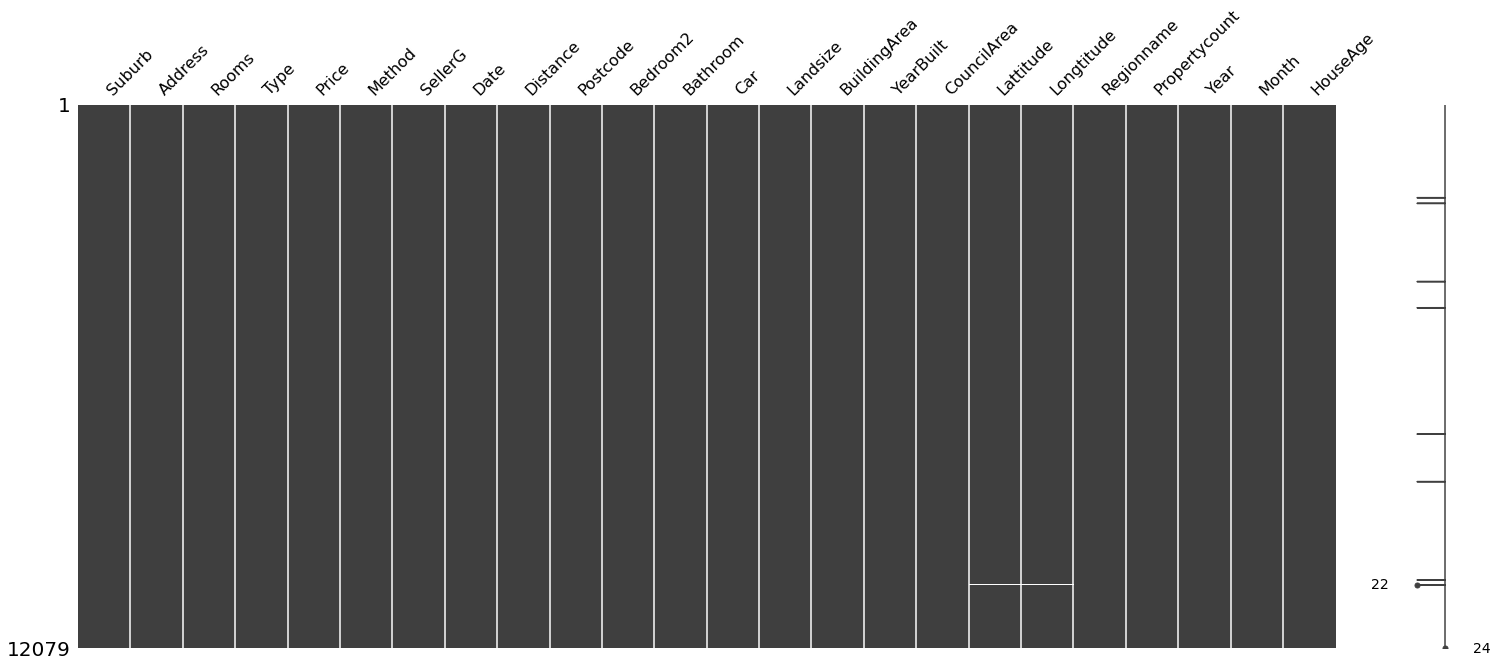

In [8]:
# After cleaning
msno.matrix(df.sort_values(['Bedroom2']))

#3 Target Variable
We are trying the predict house price based on its features. The distribution of price of the houses is as follow. 

The median of the Melbourne house price is 885000 aud
The most expensive house was sold for 9000000 aud
The mean of the Melbourne house price is
The mode of the Melbourne house price is


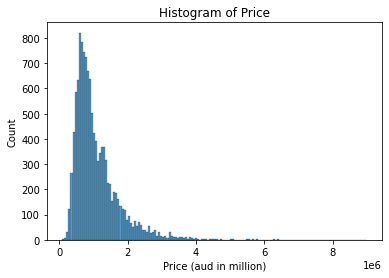

In [9]:
ax = sns.histplot(x='Price', data = df)
ax.set_title('Histogram of Price')
ax.set_xlabel('Price (aud in million)')
print('The median of the Melbourne house price is {} aud'.format(int(df.Price.median())))
print('The most expensive house was sold for {} aud'.format(int(df.Price.max())))
print('The mean of the Melbourne house price is'.format(int(df.Price.mean())))
print('The mode of the Melbourne house price is'.format(int(df.Price.mode())))

# 4 Preparation to join the supplemental dataset

The supplemental dataset we used is downloaded from Melbourne's Tax office; 

1. We need to change Postcode datatype to object as postcode is categorical data and so datasets can joined on it.
2. We only kept date range from 2016-03-31 to 2018-04-01 in our dataset to match the income dataset (income dataset is beased on 2016-2018)

In [10]:
df['Postcode'] = df['Postcode'].astype('float').astype('int32').astype('str')
df = df.loc[(df.Date < '2018-04-01') & (df.Date > '2016-03-31')]
df.reset_index(drop=True, inplace=True)

Rename the joined dataset so they are more interpretable;

The data type of numerical data stroed in the supplemental dataset are str, due to commas are existed in those numbers. Thus, we have to strip commas out of the numerical data so they can be stored as float for future calculation.  

Postcode needs to be changed into objects as even though they are in numbers, as Postcode are supposed to be categorical data


In [11]:
df_tax.columns = ['Taxable status','State', "Postcode", 'number of adults','total income no','total income aud','work expense aud','low income no','private health no']
# extract comma out of the strings
df_tax[df_tax.columns.difference(['Taxable status','State', "Postcode"])] = df_tax[df_tax.columns.difference(['Taxable status','State', "Postcode"])].apply(lambda x: x.str.replace(",",''), axis = 1).astype('float')

Left join income dataset to house price dataset;

Add some variables for future visualizations.



In [12]:
#extract postcode and other variables out of df_tax
df_pop = df_tax.groupby('Postcode').sum().reset_index()
df_pop['Postcode'] = df_pop['Postcode'].astype('object')
#left join df_tax into df
df_all = df.merge(df_pop, on = ['Postcode'], how ='left')
#Adding more variables
df_all['average_income'] = df_all['total income aud']/df_all['number of adults']
df_all['low_income_%'] = df_all['low income no']/df_all['number of adults']
df_all['work_expense_%'] = df_all['work expense aud']/df_all['total income aud']


#5 Visualizations
In this part, we will use visualizations to help you get some baisc understandings of the data

## 5.1 Geographic Analysis
Demostrate the effect of distance from CBD, council, council wealthiness etc. on house price

### 5.1.1 Price Distribution by Council
Boroondara City Council has the highest median house price

Text(0.5, 1.0, 'Price Distribution by Council')

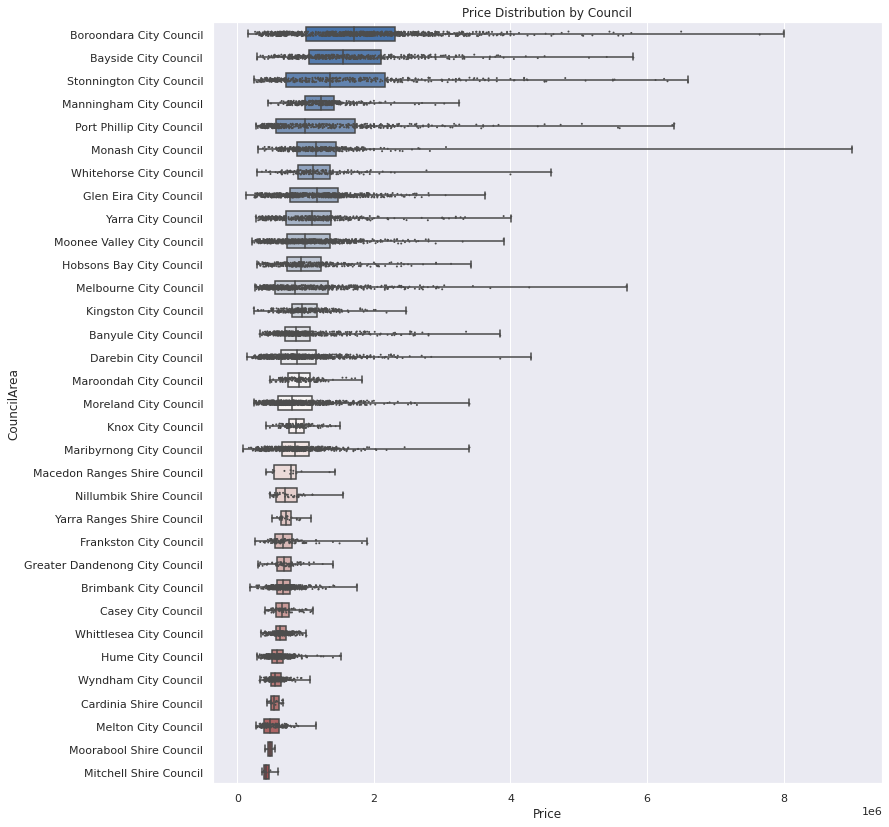

In [ ]:
## House price by council area
import matplotlib.pyplot as plt
plt.figure(figsize=(12,14))
df_cleansed = df_all.groupby('CouncilArea').agg({'Price':"mean"})
df_cleansed = df_cleansed.sort_values('Price', ascending = False)
plot = sns.boxplot(x='Price', y = 'CouncilArea', data = df_all,whis=[0, 100], width=.6, palette="vlag",order = list(df_cleansed.index))
sns.stripplot(x='Price', y = 'CouncilArea', data=df_all,size=2, color=".3", linewidth=0,order = list(df_cleansed.index))
plot.set_title('Price Distribution by Council')
#sns.despine(trim=True, left=True)

### 5.1.2 Council Wealthiness vs Price per Square
Councils with resiedents who have higher average income tend to has higher housing price;</br>
Houses tend to be more expensive on price per square when houses gets older;</br>
Older houses but doesn't necessarily has more bedrooms;

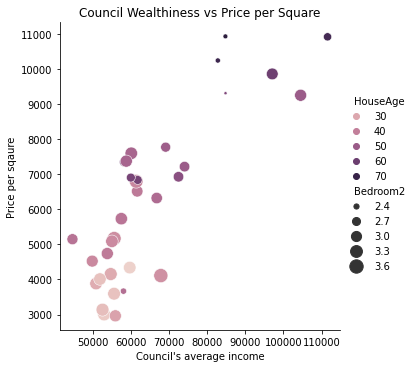

In [13]:
df_council =  df_all.groupby('CouncilArea').agg({'Price':"sum","total income aud":"sum","number of adults":"sum","BuildingArea":"sum","Distance":"mean", "HouseAge":"mean", "Bedroom2":"mean"}).reset_index()
df_council['Price per sqaure'] = df_council['Price'] / df_council['BuildingArea']
df_council['Average income'] = df_council['total income aud']/df_council['number of adults']
df_council['Median BuildingArea'] = df_council['BuildingArea'].median()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plot = sns.relplot(x = "Average income", y = "Price per sqaure", data = df_council, hue = 'HouseAge', size = "Bedroom2",sizes=(10, 200)).set(title='Council Wealthiness vs Price per Square')
plot.set_xlabels("Council's average income")

### 5.1.3 Distance to CBD vs House Price
Houses closer to CBD have higher prices; % of residents with low income tend to be higher when further from CBD with lower house price.

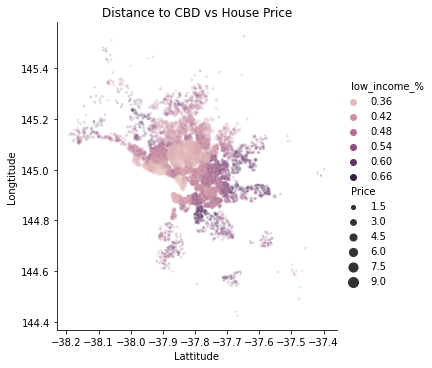

In [14]:
df_all['Price per Square'] = df_all['Price'] / df_all['Landsize']
sns.relplot(x = 'Lattitude', y = 'Longtitude', data = df_all, hue = 'low_income_%', alpha = 0.2, size = 'Price',sizes=(1, 100)).set(title='Distance to CBD vs House Price')

Answer to business question #1: 
Boroondara city council has the highest average house price;

Houses closer to CBD are more expenseive;



## 5.2 Time Analysis
In this section, we will use visualizations to demonstrate the on going trend of Melbroune's house price and the effect of purchase month on house price. 

Data Preparation

In [15]:
#calculate unit price (per square metre)
df['UnitPrice'] = df.Price / df.Landsize
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#sale volumns by month
df_by_month = df.groupby('Month').agg({'Price':'sum','Date':'count'})
#rename count column
df_by_month.rename(columns={'Date': 'count'}, inplace=True)
#reformat price in millions, easy to read numbers 
df_by_month['Sales_volumn (millions)'] = df_by_month['Price'] / 1000000
#drop the original price column
df_by_month.drop('Price', axis = 1, inplace = True)
#release month as value column
df_by_month.reset_index(inplace=True)
#avg price of house sold
df_by_month['avg_price (millions)'] = df_by_month['Sales_volumn (millions)'] / df_by_month['count']
total_sales = df_by_month['Sales_volumn (millions)'].sum()
#calculate percentage share by month
df_by_month['Percentage'] = df_by_month['Sales_volumn (millions)'] / total_sales * 100

### 5.2.1 Melbourne Housing Price Overall Trend

#### How is the overall trend of Melbourne Housing price from April 2016 to March 2018?


We can observe that the overall housing price trend fluctuates greatly. The highest housing price occurs in November 2017, while the lowest occurs in January 2018.

Text(0.5, 1.0, 'Melbourne Housing Price from 2016/04 to 2018/03')

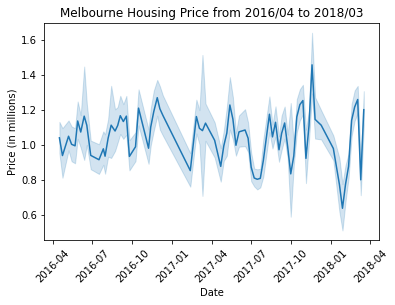

In [16]:
#generate price columns (measured in millions)
df['Price (in millions)'] = df['Price'] / 1000000


#since there are more than one records per date, we can present a 95% confidence interval of avg price on each date
sns.lineplot(data=df, x = 'Date', y = 'Price (in millions)', ci = 95)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45)
plt.title('Melbourne Housing Price from 2016/04 to 2018/03')

### 5.2.2 Melbourne Housing Sales Volumn and Avg Price by month (in millions)


#### Which month has the highest/lowest sales volumn? Do these months also have the highes/lowest avg price?

We can see that the fluctuation of the Melbourne house saling volume with the month is very obvious. </br>
January has the lowest volume as only 163.99 million, occupies only 1.08% of total sales; while October has the highest sales volumn as 1991.83 million and occupies 13.12% of total. </br>
However, when we take a look at monthly average price of Melbourne house price, the change of the average house transaction price is not obvious and not very correlated with monthly sales volumn: a higher monthly sales volumn does not represent a higher average houisng price. </br>
Average housing price per month ranges from 0.87 million to 1.13 million. The average housing price is relatively lower in January and July, while relatively higher in October and November.

Text(0.5, 1.0, 'Monthly sale volumn and avg price of Melbourne Housing (in millions)')

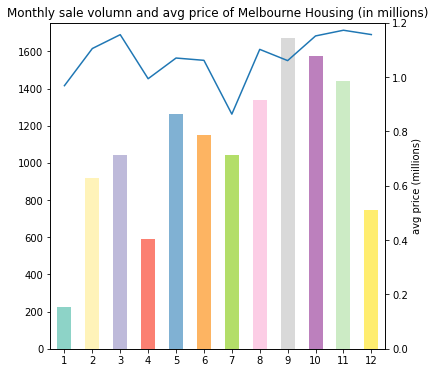

In [17]:
plt.figure(figsize=(6,6))
#line plot of avg price of each month
ax = df_by_month['avg_price (millions)'].plot(secondary_y=True)
ax.set_ylim(0, 1.2)
ax.set_ylabel('avg price (millions)')

colors = ['#8dd3c7','#fff3b9','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
#bar plot of sales volumn of each month
df_by_month.plot(x='Month', y='Sales_volumn (millions)', kind='bar', color=colors,
                 ax=ax, legend = None)

plt.title('Monthly sale volumn and avg price of Melbourne Housing (in millions)')

### 5.2.3 Sales Volumes and Average Prices on Different Seasons


#### Which season is the 'off-season' for Melbourne Housing sales?
Noted that Melbourne is in the southern hemisphere, the corresponding season is different from ours.
We can observe that Summer is the "off-season" for Melbourne housing sales.  sales volumn is only 1889.15 million and only occupies 14.53% of total sales volumn. </br>
The proportions of the other three seasons are relatively average, while Spring is the season that generates highest sales volumn of 4687.67 million.

<Figure size 432x432 with 0 Axes>

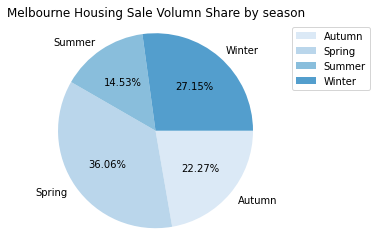

,Season,Sales_volumn (millions),count,percentage
0,Autumn,2893.68,2675,22.27
1,Spring,4686.16,4173,36.06
2,Summer,1888.18,1708,14.53
3,Winter,3528.39,3503,27.15


None

In [18]:
#categorize season by month range
df_by_month['Season'] = np.nan
lst = [df_by_month]
plt.figure(figsize=(6,6))
for column in lst:
    column.loc[(column['Month'] > 2) & (column['Month'] <= 5), 'Season'] = 'Autumn'
    column.loc[(column['Month'] > 5) & (column['Month'] <= 8), 'Season'] = 'Winter'
    column.loc[(column['Month'] > 8) & (column['Month'] <= 11), 'Season'] = 'Spring'
    column.loc[column['Month'] <= 2, 'Season'] = 'Summer'
    column.loc[column['Month'] == 12, 'Season'] = 'Summer'

season = df_by_month.groupby('Season').agg({'Sales_volumn (millions)':'sum','count':'sum'})
season.reset_index(inplace=True)
season['percentage'] = season['Sales_volumn (millions)'] / season['Sales_volumn (millions)'].sum() * 100

#plotting share of sales volumn by season
season.plot.pie(y='percentage',
        labels=season.Season,
        counterclock = False,
        autopct='%1.2f%%',
        colors=sns.color_palette("Blues"),
        radius = 2.5)
plt.axis('square')
plt.ylabel('')
plt.title('Melbourne Housing Sale Volumn Share by season')
plt.legend(season.Season, bbox_to_anchor=(1.1, 1.0))

display(season, plt.show())

Answer to Business Question #2:

Customers should consider buy houses from December to April;

No clear trend has been shown for time series

## 5.3 House Features Analysis
In this part, we will use visulizations to present the relationships between house features and its price.

There are three room types included in this dataset: 
- "h" : house(cottage,villa) 
- "u" : unit(duplex)
- "t" : townhouse.

### 5.3.1 Correlation Matrix between Price and House Features


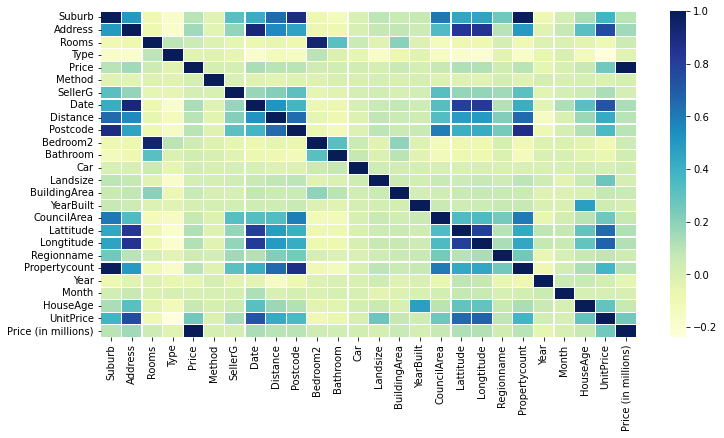

In [19]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

1. Bedrooms2, Bathrooms are strongly correlated with the house price; 
2. Landsize and BuildingArea are correlated with the house price, but the correlation is as strong. 
3. Rooms and Bedrooms are highly correlated, but as we mentioned in the introduction, we will drop variable rooms for consistency. 


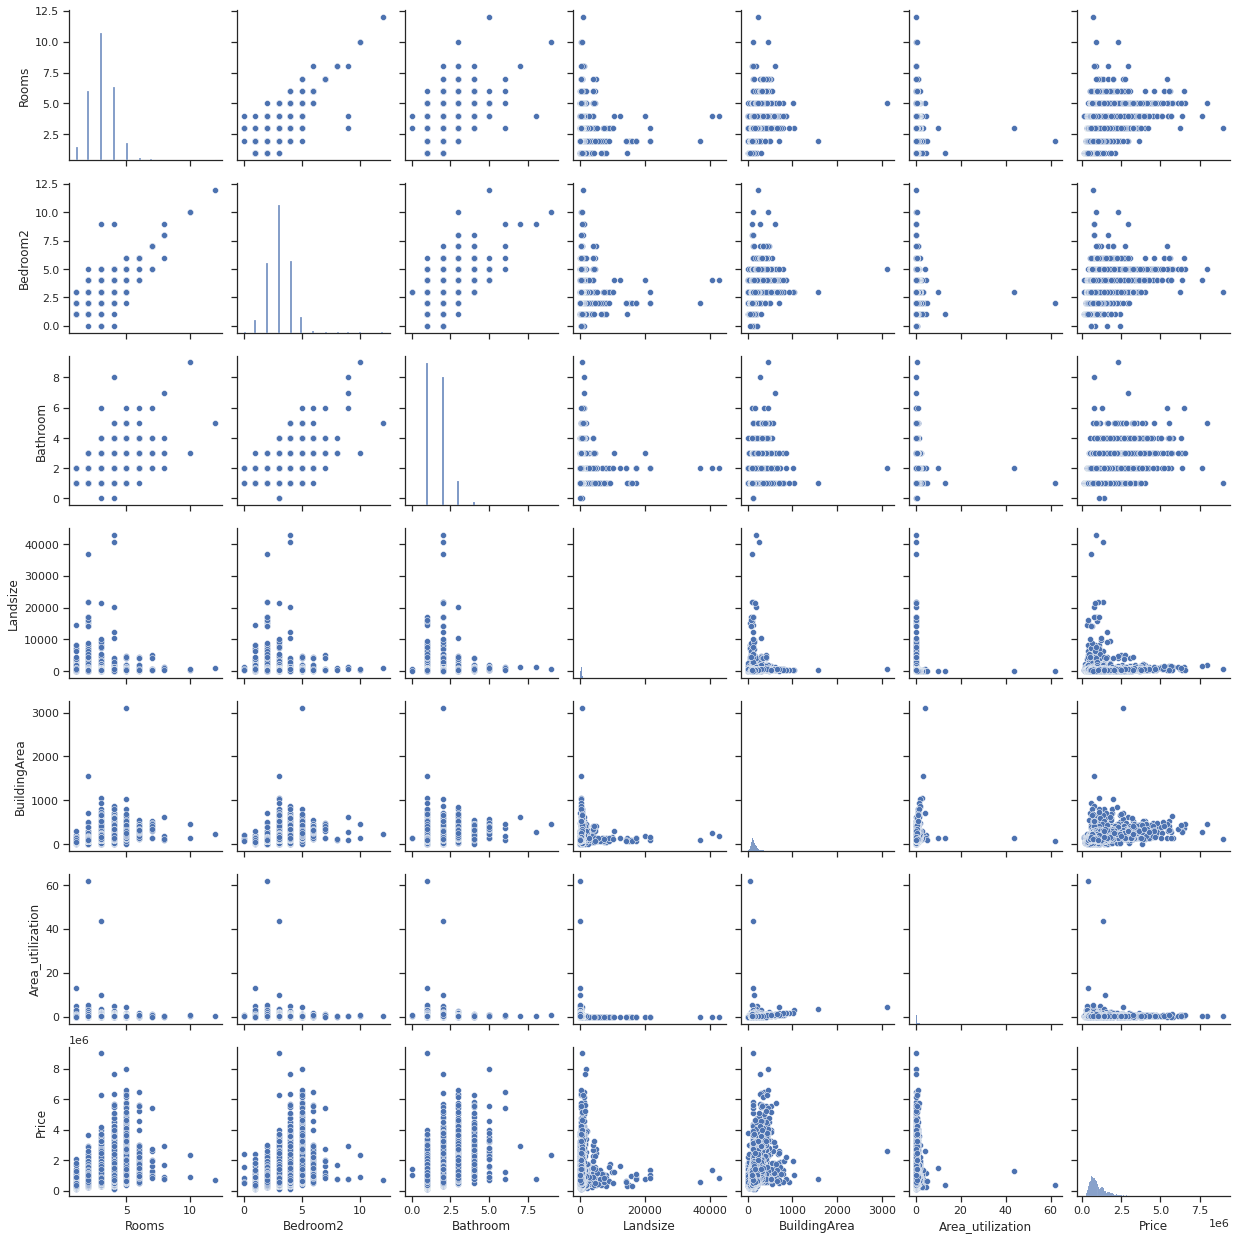

In [20]:
df['Area_utilization'] = df['BuildingArea'] /df['Landsize'] 
df_indoor = df[['Rooms','Bedroom2', 'Bathroom', 'Landsize','BuildingArea','Area_utilization','Price','Type']]
sns.set_theme(style="ticks")
sns.pairplot(df_indoor)

### 5.3.2 Sales Volume by House Type
Houses like cottages and villas have the most sales.

Duplexs has the least sales volume and lowest median price

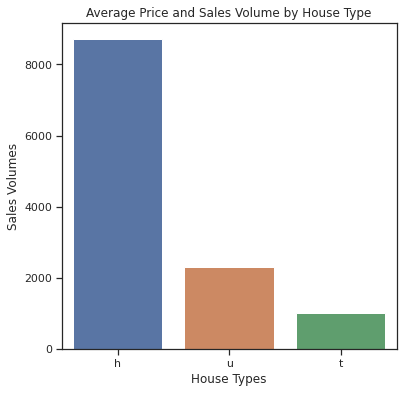

In [21]:
plt.figure(figsize=(6,6))
df_type = df.groupby('Type').agg({'Address':'count','Price':'median'}).reset_index()

g1 = sns.barplot(x = 'Type', y = 'Address', data = df_type, order = ['h','u','t'] )

g1.set_title('Average Price and Sales Volume by House Type')
g1.set_xlabel('House Types')
g1.set_ylabel('Sales Volumes')
sns.set(rc={'figure.figsize':(4,8)})

### 5.3.3 Houses with different total Number of rooms and its Average Price
Price tend to be higher for houses have more [Bedrooms, Bathrooms and Garages], and houses will more rooms are more likely to be type h(villas). 

Most of the houses have 4-8 rooms in total(including garages) 


In [22]:
df_room = df[['Bedroom2','Bathroom','Car','Price','Type','Lattitude']]
df_room['Total_room'] = df_room['Bedroom2']+df_room['Bathroom']+df['Car']
df_room = pd.get_dummies(df_room)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Houses with different total Number of rooms and its Average Price')

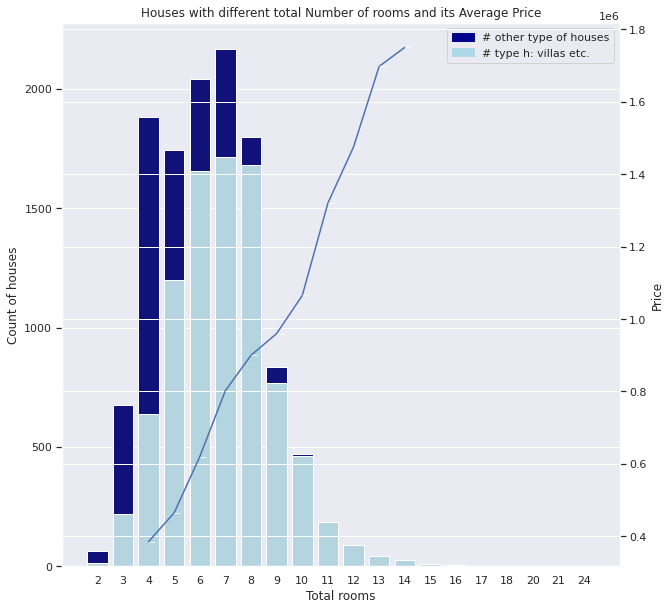

In [40]:

### Use lattitude to count the number of houses for each group. 
tp = df_room.groupby('Total_room').agg({'Price':'median','Lattitude':'count','Type_h':'sum'}).reset_index()
tp['Total_room']= tp['Total_room'].astype('int32')
plt.figure(figsize=(10,10))
bar1 = sns.barplot(x='Total_room', y = 'Lattitude',data=tp, color = 'Darkblue')
bar2= sns.barplot(x='Total_room', y = 'Type_h', data = tp,color = 'Lightblue')
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='# other type of houses')
bottom_bar = mpatches.Patch(color='lightblue', label='# type h: villas etc.')
plt.legend(handles=[top_bar, bottom_bar])

line1 = bar2.twinx()
line1 = sns.lineplot(x= 'Total_room', y = 'Price',data = tp[tp['Total_room']<=12], marker = True)

#number of apartments for the y axis EXPLAIN

bar2.set_xlabel('Total rooms')
bar2.set_ylabel('Count of houses')
bar2.set_title('Houses with different total Number of rooms and its Average Price')



### 5.3.4 Price distribution by house type
Villas has higher house price in median, and it also has more outliers(REALLY EXPENSIVE HOUSES)

Villas tend to be older in house ages, further from the CBD on average, and larger on buildingarea.

Units have less bedrooms, bathrooms and buildingArea, but interestly they have larger landsizes. 


,avg_bedrm,avg_bathrm,avg_landsize,avg_buildingarea,avg_HouseAge,avg_distance
Type,,,,,,
h,3.36,1.73,553.21,163.54,57.77,12.32
t,2.86,1.82,355.92,136.36,17.18,10.21
u,1.97,1.19,706.83,93.73,36.23,7.88


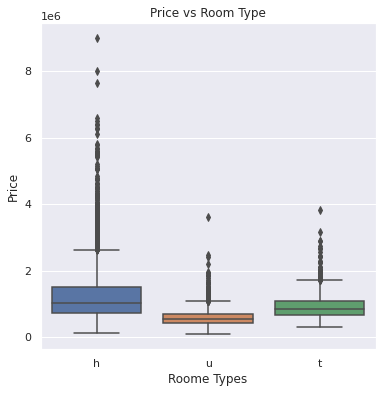

<Figure size 432x432 with 0 Axes>

In [41]:
plt.figure(figsize=(6,6))
g2 = sns.boxplot(x = 'Type', y = 'Price', data = df, order = ['h', 'u', 't'])
plt.figure(figsize=(6,6))
g2.set_title('Price vs Room Type')
g2.set_xlabel('Roome Types')

avg_bedrm_type = df.groupby('Type')['Bedroom2'].mean()
avg_bathrm_type = df.groupby('Type')['Bathroom'].mean()
avg_landsize_type = df.groupby('Type')['Landsize'].mean()
avg_buildingarea_type = df.groupby('Type')['BuildingArea'].mean()
avg_HouseAge_type = df.groupby('Type')['HouseAge'].mean()
avg_distance_type = df.groupby('Type')['Distance'].mean()

type_comparison = pd.DataFrame({'avg_bedrm': avg_bedrm_type, 
                                'avg_bathrm': avg_bathrm_type, 
                                'avg_landsize' : avg_landsize_type, 
                                'avg_buildingarea' : avg_buildingarea_type,
                                'avg_HouseAge': avg_HouseAge_type,
                                'avg_distance': avg_distance_type})

display(g2,type_comparison)

## 5.4 Sales Method Analysis
In this part we will try to analyze if sales method has effect on sales price and the abbreviations of selling methods in the data are as follows:</br>

Method:</br>
S - property sold;</br>
SP - property sold prior;</br>
PI - property passed in;</br>
PN - sold prior not disclosed;</br>
SN - sold not disclosed;</br>
NB - no bid;</br>
VB - vendor bid;</br>
W - withdrawn prior to auction;</br>
SA - sold after auction;</br>
SS - sold after auction price not disclosed.</br>

Answer to Business Question #3:
Villas are more popular and have higher average price.

### 5.4.1 Median Price by Sales Method
We dropped 'PN','SN','SS','W' previously as no price is disclosed. </br> And through the box plot, we found that method of sales doesn't affect the price a lot as the medians tend to be close to each other.


In [42]:
# We dropped 'PN','SN','SS','W' previously as no price is disclosed
df['Method'].unique()

array(['SP', 'VB', 'S', 'PI', 'SA'], dtype=object)

Text(0.5, 1.0, 'Distribution of Prices of different selling methods')

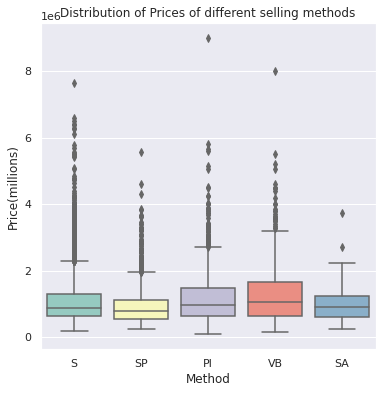

In [43]:
# Median prices with different selling methods are relatively the same
plt.figure(figsize=(6,6))
m=sns.boxplot(x=df['Method'], y=df['Price'], data=df, palette='Set3',order=['S','SP','PI','VB','SA'])
m.set_xlabel('Method')
m.set_ylabel('Price(millions)')
m.set_title('Distribution of Prices of different selling methods')

### 5.4.2 Average Price by Sales Method
Although the median price is similar, the average price of different selling methods is still different.</br> The average price of a house sold through the vendor bidding method is the highest.</br> And Jellis is the house agency that uses this method the most.

In [44]:
# Average price with different selling methods
pd.DataFrame(df.groupby('Method')['Price'].mean().sort_values(ascending=False)).reset_index()

,Method,Price
0,VB,1259069.81
1,PI,1173693.48
2,S,1067988.33
3,SA,994261.38
4,SP,918092.20


In [45]:
# Real estate agent Jellis uses the vendor bidding method the most times
count_vb=df[df['Method']=='VB'].groupby('SellerG').count()
pd.DataFrame(count_vb['Address'].sort_values(ascending=False).head(5)).reset_index()

,SellerG,Address
0,Jellis,201
1,Nelson,181
2,Marshall,111
3,hockingstuart,85
4,Barry,47


### 5.4.3 Usage of the Sales Method
Most of the houses are normally sold on the website; However, there are an amount of houses were passed in during auctions and some others were sold by bidding. 

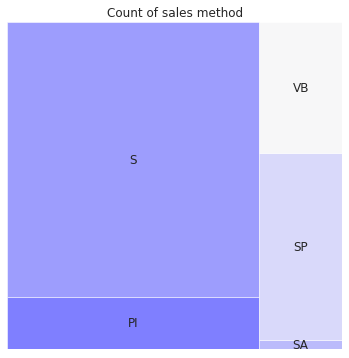

In [46]:
# The frequency of use of the sales method can be seen by the size of the color block
!pip install squarify
import matplotlib.pyplot as plt
import squarify 
df_method = df.groupby('Method')['Suburb'].count().reset_index()


plt.figure(figsize=(6,6))
colors = sns.light_palette("blue", 5, reverse=True)
squarify.plot(sizes=df_method.Suburb, label=df_method.Method, alpha=0.5, color=colors).set_title('Count of sales method')
plt.axis('off')
plt.show()


## 5.5 Conclusion of EDA
Throughout the EDA part, we have the following findings which can help you better understand the dataset and potentially decrease the rmse of our machine learning models: 

- Houses located at different councils tend to vary greatly with each other. Houses located at wealthy councils which are closer to the CBD have higher price per square. Besides, older houses tend to be more expensive on the house market. 
- Houses sold on September to November has the highest average price, but the house market suddenly cool down afterwards starting from December to April. Be noted that the seaons in southern hemisphere is reversed from US. Besides, we couldn't see a trend of house price when looking at the time series data from 2016 to 2018.
- Type h (villas) of houses tend to have more rooms (sum of bedrooms & bathrooms and carspots) and higher prices, and most of the houses sold have 4-8 rooms in total. 
- Houses sold by different sales method seems not have a lot effect on the sold price. Real estate agents tend to not have a significant effect on house price.

#6 Machine Learning Models
In this part we will try to use machine learning models to predict the sales price of a house when given required data. Furthermore, we will test out diffrent machine learning models and use feature enginering to find a way to minimize rmse and improves accuracy. 

Machine Learning Model to Test Features:

- Linear Regression

- Decision Tree

Feature Engineering:
- average_income
- % of low income adult
- % of Work expense% 
- HouseAge

In [47]:
df_all.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,HouseAge,number of adults,total income no,total income aud,work expense aud,low income no,private health no,average_income,low_income_%,work_expense_%,Price per Square
0,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-03-04,2.50,3067,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017,3,117.00,6291.00,6238.00,445761438.00,11275394.00,2833.00,3604.00,70857.01,0.45,0.03,10932.84


## 6.1 Feature Processing and One-Hot Encoding
We will firstly dorp those variables which don't have predictive powers such as address; </br>
Drop latitude and longitude as they are replaced by other geographical data; </br> 
Drop Seller G as we found it might not contribute a lot predictive power to the target variable;</br>
Drop date & year as we did not see the trend of price on the time series data; </br>
Drop rooms as it was scraped from another website by the author;  </br>
Drop Price per Square as its computed by our target variable price. </br>
Transfer Categorical variables into dummy variables so they can be used in sklearn machine learning models. 

In [48]:
#scaling price in a 100 thousand unit
df_all['Price'] = df_all['Price']/100000

In [49]:
# Group by councilarea
#df_suburb = df_all.groupby(['Postcode','Suburb']).agg({'Propertycount':'sum'}).reset_index().drop('Suburb',axis = 1)
#df_suburb = df_suburb.groupby(['Postcode']).sum().reset_index()
#df_council1 = df_all.groupby(['CouncilArea','Postcode']).agg({'number of adults':'mean','total income aud':'mean','total income aud':'mean','work expense aud':'mean','low income no':'mean','private health no':'mean'}).reset_index()
#df_council1 = df_council1.merge(df_suburb,on='Postcode')

df_council = df_all.drop(['Address','Rooms','Date','Lattitude','Longtitude','SellerG','Year','Price per Square'],axis =1 )
#Drop engineered variables
df_council = df_council.drop(df_council.loc[:, 'number of adults':'work_expense_%'].columns,axis =1)
df_council = pd.get_dummies(df_council,drop_first=True)
df_council.head(1)

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Month,HouseAge,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,...,Postcode_3978,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,14.65,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,4019.00,3,117.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## 6.2 Feature Enginerring and Testing

### 6.2.1 LinerRegression and DecisionTreeRegressor model using original variables.

In [50]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


X = df_council.drop('Price',axis =1)
y = df_council.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=780)

# Initiate the model: reg
reg = LinearRegression()

# Fit the model to the data
model = reg.fit(X_train, y_train)
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

print('The rmse when using linear regression and keeping origin variables is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using linear regression and keeping origin variables is {}'.format(r2_score(y_test,y_pred)))

#Decision Tree
reg2 = DecisionTreeRegressor()

model = reg2.fit(X_train, y_train)

y_pred = reg2.predict(X_test)

print('The rmse when using decision tree and keeping origin variables is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using decision tree and keeping origin variables is {}'.format(r2_score(y_test,y_pred)))

The rmse when using linear regression and keeping origin variables is 17732995.006322097
The R2 when using linear regression and keeping origin variables is -6306267629197.028
The rmse when using decision tree and keeping origin variables is 4.395567914431525
The R2 when using decision tree and keeping origin variables is 0.6125298924634904


We found out that we still included that including too much geographical data. Decide to drop suburb and postcode.


In [51]:
#Linear Regression
df_no_post = df_all.drop(['Address','Rooms','Date','Lattitude','Longtitude','SellerG','Year','Price per Square','Postcode','Suburb'],axis =1 )
df_no_post = df_no_post.drop(df_no_post.loc[:, 'number of adults':'work_expense_%'].columns,axis =1)
df_no_post = pd.get_dummies(df_no_post,drop_first=True)


X = df_no_post.drop('Price',axis =1)
y = df_no_post.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=780)

# Initiate the model: reg
reg = LinearRegression()

# Fit the model to the data
model = reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

print('The rmse when using linear regression and keeping origin variables but dropped postcode and surburb is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using linear regression and keeping origin variables but dropped postcode and surburb is {}'.format(r2_score(y_test,y_pred)))

#Decision Tree
reg2 = DecisionTreeRegressor()

model = reg2.fit(X_train, y_train)

y_pred = reg2.predict(X_test)

print('The rmse when using decision tree and keeping origin variables but dropped postcode and surburb is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using decision tree and keeping origin variables but dropped postcode and surburb is {}'.format(r2_score(y_test,y_pred)))

The rmse when using linear regression and keeping origin variables but dropped postcode and surburb is 4.284277172697195
The R2 when using linear regression and keeping origin variables but dropped postcode and surburb is 0.6319021050050069
The rmse when using decision tree and keeping origin variables but dropped postcode and surburb is 4.537181948021891
The R2 when using decision tree and keeping origin variables but dropped postcode and surburb is 0.5871611067532403


Interestingly, the rmse of decision tree increased but the rmse of linear regression decreased.  

Finally, we would like to test out if adding up all the engineered variables will help decrease the rmse.

In [52]:
df_final = df_all.drop(['Address','Rooms','Date','Lattitude','Longtitude','SellerG','Year','Price per Square','Postcode','Suburb','Method'],axis =1 )
df_final = pd.get_dummies(df_final,drop_first=True)


X = df_final.drop('Price',axis =1)
y = df_final.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=780)
# Initiate the model: reg
reg = LinearRegression()

# Fit the model to the data
model = reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

print('The rmse when using linear regression and keeping origin variables but dropped postcode and surburb is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using linear regression and keeping origin variables but dropped postcode and surburb is {}'.format(r2_score(y_test,y_pred)))

#Decision Tree
reg2 = DecisionTreeRegressor()

model = reg2.fit(X_train, y_train)

y_pred = reg2.predict(X_test)

print('The rmse when using decision tree and keeping origin variables but dropped postcode and surburb is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('The R2 when using decision tree and keeping origin variables but dropped postcode and surburb is {}'.format(r2_score(y_test,y_pred)))

The rmse when using linear regression and keeping origin variables but dropped postcode and surburb is 4.173364067052199
The R2 when using linear regression and keeping origin variables but dropped postcode and surburb is 0.6507143375776625
The rmse when using decision tree and keeping origin variables but dropped postcode and surburb is 4.383862451906217
The R2 when using decision tree and keeping origin variables but dropped postcode and surburb is 0.6145908219439801


## 6.3 Test of different models

### 6.3.1 One-hot encoding
We compared 12 different regression models to fit our dataset. The input is the dataset after one-hot encoding and then we pint out the presiction score of each of them. The output score of SVM and MLP are negative. The best model after one-hot encoding is Random Forset which has the highest score of 0.78.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn import neural_network
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor


X = df_final.drop('Price',axis =1)
y = df_final.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=780)

models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),neural_network.MLPRegressor(hidden_layer_sizes=(2048, 512), verbose=True, learning_rate_init = 0.1, early_stopping=True)]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging','MLP']
score_=[]


for name,model in zip(models_str,models):
    print('Start Training：'+name)
    model=model
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)  
    score=model.score(X_test,y_test)
    score_.append(str(score)[:5])
    print(name +'Score:'+str(score))

Start Training：LinearRegression
LinearRegressionScore:0.6507143375776625
Start Training：KNNRegressor
KNNRegressorScore:0.5967237183895653
Start Training：SVR
SVRScore:-0.042420694713600104
Start Training：Ridge
RidgeScore:0.6499027979817297
Start Training：Lasso


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.77248e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81434.97860592187, tolerance: 36.34860267030099
  positive)


LassoScore:0.4960977806841154
Start Training：DecisionTree
DecisionTreeScore:0.6310673754629466
Start Training：ExtraTree
ExtraTreeScore:0.6361698545910321
Start Training：RandomForest
RandomForestScore:0.7844060998517254
Start Training：AdaBoost
AdaBoostScore:0.3203206037170039
Start Training：GradientBoost
GradientBoostScore:0.7817035448255628
Start Training：Bagging
BaggingScore:0.7752341902269367
Start Training：MLP
Iteration 1, loss = 327131103382691971072.00000000
Validation score: -0.074890
Iteration 2, loss = 22.82894938
Validation score: -0.000021
Iteration 3, loss = 21.73926913
Validation score: -0.000313
Iteration 4, loss = 21.67687781
Validation score: -0.000155
Iteration 5, loss = 21.70392106
Validation score: -0.000868
Iteration 6, loss = 21.68637544
Validation score: -0.001197
Iteration 7, loss = 21.68349278
Validation score: -0.000502
Iteration 8, loss = 21.67593912
Validation score: -0.000578
Iteration 9, loss = 21.69454143
Validation score: -0.000004
Iteration 10, loss = 21.

### 6.3.2 Scaling features
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, SVM and MLP are negative svores which may because of without scaling features. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it. It may contribute to other models.

Answer to business question #4

After scaling, the best model is still Random Forest which is 0.832. The score of SVM and MLP turned to positive and have a good performance.


In [55]:
df_final = df_all.drop(['Address','Rooms','Date','Lattitude','Longtitude','SellerG','Year','Price per Square','Postcode','Suburb','Method'],axis =1 )
df_final = pd.get_dummies(df_final,drop_first=True) 

#scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_scale=scaling.fit_transform(X)
x_train_scale,x_test_scale,y_train1,y_test1 = train_test_split(x_scale,y,test_size = 0.3, random_state = 2)


models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),DecisionTreeRegressor(),ExtraTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),neural_network.MLPRegressor(hidden_layer_sizes=(2048, 512), verbose=True, learning_rate_init = 0.001, early_stopping=True)]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','DecisionTree','ExtraTree','RandomForest','AdaBoost','GradientBoost','Bagging','MLP']
score_=[]

for name,model in zip(models_str,models):
    print('Start Training：'+name)
    model=model
    model.fit(x_train_scale,y_train1)
    y_pred=model.predict(X_test)  
    score=model.score(x_test_scale,y_test1)
    score_.append(str(score)[:5])
    print(name +'Score:'+str(score))

Start Training：LinearRegression
LinearRegressionScore:0.6822104104172009
Start Training：KNNRegressor
KNNRegressorScore:0.7565828432252655
Start Training：SVR
SVRScore:0.7546159453727589
Start Training：Ridge
RidgeScore:0.6805714211465745
Start Training：Lasso
LassoScore:0.5857888669279612
Start Training：DecisionTree
DecisionTreeScore:0.5243954470104853
Start Training：ExtraTree
ExtraTreeScore:0.5800007650464865
Start Training：RandomForest
RandomForestScore:0.8268593148937804
Start Training：AdaBoost
AdaBoostScore:0.31424654574610655
Start Training：GradientBoost
GradientBoostScore:0.8181944841101944
Start Training：Bagging
BaggingScore:0.8153435374584251
Start Training：MLP
Iteration 1, loss = 14.85784452
Validation score: 0.768645
Iteration 2, loss = 5.68727362
Validation score: 0.800399
Iteration 3, loss = 5.11612340
Validation score: 0.802497
Iteration 4, loss = 4.84967905
Validation score: 0.816522
Iteration 5, loss = 4.62182286
Validation score: 0.829970
Iteration 6, loss = 4.40444059
Val

In [56]:

#adjust MLP parameters 
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_scale=scaling.fit_transform(X)
x_train_scale,x_test_scale,y_train1,y_test1 = train_test_split(x_scale,y,test_size = 0.3, random_state = 2)


models=[neural_network.MLPRegressor(hidden_layer_sizes=(4096,512), verbose=True, learning_rate_init = 0.001, early_stopping=True)]
models_str=['MLP']
score_=[]

for name,model in zip(models_str,models):
    print('Start Training：'+name)
    model=model
    model.fit(x_train_scale,y_train1)
    y_pred=model.predict(X_test)  
    score=model.score(x_test_scale,y_test1)
    score_.append(str(score)[:5])
    print(name +'Score:'+str(score))

Start Training：MLP
Iteration 1, loss = 13.02466264
Validation score: 0.609508
Iteration 2, loss = 4.59710319
Validation score: 0.665560
Iteration 3, loss = 4.29178490
Validation score: 0.677718
Iteration 4, loss = 3.97515632
Validation score: 0.692770
Iteration 5, loss = 3.81591494
Validation score: 0.702938
Iteration 6, loss = 3.56737661
Validation score: 0.711121
Iteration 7, loss = 3.43327216
Validation score: 0.709894
Iteration 8, loss = 3.75489501
Validation score: 0.713867
Iteration 9, loss = 3.22425355
Validation score: 0.721285
Iteration 10, loss = 3.14351037
Validation score: 0.721914
Iteration 11, loss = 3.17088918
Validation score: 0.720038
Iteration 12, loss = 3.07688634
Validation score: 0.732633
Iteration 13, loss = 2.98260728
Validation score: 0.729155
Iteration 14, loss = 2.97816170
Validation score: 0.737151
Iteration 15, loss = 2.92375789
Validation score: 0.711807
Iteration 16, loss = 2.90540201
Validation score: 0.734613
Iteration 17, loss = 2.90367190
Validation sc

# 7 Conclusion of The Project
Throughout this project, we are able to predict a reasonable house price using a given range of features. Our model can contribute to the following three scenarios:

- Customers can find a house at a reasonable price
- Real estate developers can set prices based on our model
- The housing market can be in a steady state

Challenges:
- Have trouble dealing with missing values & imputation
Some features have over-half missing values 

- Spent a lot of time of joining the two datasets
Numbers like price were stored as text : “$232,112.12”
Postcode type mismatched with origin dataset

Limitations:
- After processing with missing data imputation, the timeline is not continuous for 3 years.
- Although the time span is 3 years long, our data actually only has 24 months; Cannot make month-to-month comparison by year

- Lack of some important features like room size, nearby infrastructures.



*citations*

- seaborn scatter plot
 *https://seaborn.pydata.org/examples/scatterplot_sizes.html*

- xlim
 *https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python*

- Tree Map *https://www.analyticsvidhya.com/blog/2021/06/build-treemaps-in-python-using-squarify/*

- Feature scaling *https://en.wikipedia.org/wiki/Feature_scaling*